In [170]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import sklearn.neighbors as nbr

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
df = pd.read_csv("C:\\Users\\krina\\breastcancer.csv")

print(df.shape)

(569, 33)


In [171]:
#ALLOCATING NAN VALUES  RANDOMLY
nan_mat = np.random.random(df.shape)<0.2
nan_mat

array([[False, False, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False]])

In [172]:
nan_mat.sum()

3736

In [173]:
df_NaN = df.mask(nan_mat)

In [174]:
df_NaN

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.6,2019.0,0.16220,0.66560,NaN,0.2654,0.4601,0.11890,NaN
1,842517.0,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,NaN,1956.0,NaN,0.18660,0.2416,0.1860,NaN,0.08902,NaN
2,NaN,M,19.69,21.25,130.00,1203.0,NaN,NaN,0.19740,NaN,...,25.53,NaN,1709.0,NaN,0.42450,NaN,0.2430,0.3613,0.08758,NaN
3,84348301.0,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.24140,0.10520,...,26.50,NaN,NaN,0.20980,0.86630,0.6869,0.2575,NaN,NaN,NaN
4,NaN,M,NaN,14.34,NaN,1297.0,0.10030,0.13280,0.19800,NaN,...,16.67,152.2,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,NaN,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,NaN,NaN
565,926682.0,M,20.13,NaN,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.0,1731.0,0.11660,0.19220,NaN,0.1628,0.2572,0.06637,NaN
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,NaN,NaN,0.11390,0.30940,0.3403,NaN,0.2218,0.07820,NaN
567,NaN,M,20.60,29.33,NaN,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.6,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [175]:
#DEALING WITH NAN VALUES BY FILLING IT WITH 0

df_NaN.fillna(0)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.6,2019.0,0.16220,0.66560,0.0000,0.2654,0.4601,0.11890,0.0
1,842517.0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,0.0,1956.0,0.00000,0.18660,0.2416,0.1860,0.0000,0.08902,0.0
2,0.0,M,19.69,21.25,130.00,1203.0,0.00000,0.00000,0.19740,0.00000,...,25.53,0.0,1709.0,0.00000,0.42450,0.0000,0.2430,0.3613,0.08758,0.0
3,84348301.0,M,11.42,20.38,77.58,386.1,0.00000,0.28390,0.24140,0.10520,...,26.50,0.0,0.0,0.20980,0.86630,0.6869,0.2575,0.0000,0.00000,0.0
4,0.0,M,0.00,14.34,0.00,1297.0,0.10030,0.13280,0.19800,0.00000,...,16.67,152.2,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,0.0,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.00000,0.0
565,926682.0,M,20.13,0.00,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.0,1731.0,0.11660,0.19220,0.0000,0.1628,0.2572,0.06637,0.0
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,0.0,0.0,0.11390,0.30940,0.3403,0.0000,0.2218,0.07820,0.0
567,0.0,M,20.60,29.33,0.00,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.6,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [176]:
df=df_NaN.fillna(0)

In [177]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.6,2019.0,0.16220,0.66560,0.0000,0.2654,0.4601,0.11890,0.0
1,842517.0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,0.0,1956.0,0.00000,0.18660,0.2416,0.1860,0.0000,0.08902,0.0
2,0.0,M,19.69,21.25,130.00,1203.0,0.00000,0.00000,0.19740,0.00000,...,25.53,0.0,1709.0,0.00000,0.42450,0.0000,0.2430,0.3613,0.08758,0.0
3,84348301.0,M,11.42,20.38,77.58,386.1,0.00000,0.28390,0.24140,0.10520,...,26.50,0.0,0.0,0.20980,0.86630,0.6869,0.2575,0.0000,0.00000,0.0
4,0.0,M,0.00,14.34,0.00,1297.0,0.10030,0.13280,0.19800,0.00000,...,16.67,152.2,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,0.0,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.00000,0.0
565,926682.0,M,20.13,0.00,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.0,1731.0,0.11660,0.19220,0.0000,0.1628,0.2572,0.06637,0.0
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,0.0,0.0,0.11390,0.30940,0.3403,0.0000,0.2218,0.07820,0.0
567,0.0,M,20.60,29.33,0.00,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.6,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [178]:
df.to_csv('kri.csv')

In [179]:
df=pd.read_csv('C:\\Users\\krina\\CLS.csv')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
Unnamed: 0                 569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [181]:
# Describe the dataset
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.00,1001.0,0.11840,0.00000,0.3001,0.00000,0.2419,...,25.38,17.33,184.60,2019.0,0.0000,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,0.00,132.90,1326.0,0.08474,0.07864,0.0000,0.07017,0.1812,...,24.99,23.41,158.80,0.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.00,1203.0,0.00000,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,0.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.0000,0.10520,0.2597,...,0.00,0.00,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.00000,0.1980,0.00000,0.1809,...,0.00,16.67,152.20,1575.0,0.1374,0.0000,0.4000,0.1625,0.2364,0.07678


In [182]:
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.385710,15.307100,72.265729,523.066432,0.077938,0.083287,0.073405,0.038643,0.146193,...,12.930114,20.787926,84.894271,715.171178,0.104753,0.205298,0.228360,0.092441,0.227408,0.066180
std,NaN,6.469169,8.718172,43.761095,409.824702,0.039687,0.062319,0.078746,0.039856,0.074987,...,7.788953,11.554753,53.518745,608.187058,0.057465,0.173272,0.219592,0.074345,0.132885,0.038053
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,9.720000,13.270000,60.340000,288.500000,0.077410,0.043620,0.013420,0.006588,0.146700,...,10.750000,17.130000,68.030000,374.400000,0.095340,0.082400,0.040430,0.026800,0.204800,0.062060
50%,NaN,12.580000,17.520000,79.470000,477.100000,0.090560,0.078040,0.045150,0.026420,0.170700,...,13.750000,23.410000,88.910000,591.000000,0.124100,0.180800,0.179100,0.082880,0.264600,0.076030
75%,NaN,14.970000,21.020000,96.450000,685.900000,0.102600,0.120600,0.112700,0.059800,0.190900,...,17.090000,28.260000,113.800000,915.300000,0.141800,0.296800,0.345800,0.147600,0.306200,0.088510


In [184]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.045146,0.196222,0.298458,0.040083,0.181941,0.287060,0.341160,0.057788,-0.025539,...,0.274166,0.084011,0.247467,0.312143,-0.009558,0.130035,0.244737,0.291948,0.004417,-0.023343
texture_mean,0.045146,1.000000,0.162069,0.098246,-0.062251,0.099093,0.105480,0.183409,-0.036861,0.022365,...,0.051074,0.175822,0.045652,0.087351,0.120454,0.105368,0.176317,0.169264,0.079797,0.025212
perimeter_mean,0.196222,0.162069,1.000000,0.292024,-0.006051,0.178238,0.294995,0.299134,-0.001650,-0.061655,...,0.178227,0.110384,0.222543,0.288409,0.053987,0.197348,0.248721,0.234642,0.065415,0.036136
area_mean,0.298458,0.098246,0.292024,1.000000,-0.016646,0.192913,0.427835,0.414631,0.010186,-0.003856,...,0.257761,0.084199,0.347768,0.476887,0.001719,0.184796,0.245633,0.418617,0.007345,-0.029164
smoothness_mean,0.040083,-0.062251,-0.006051,-0.016646,1.000000,0.024783,0.072975,0.111000,0.042109,0.006436,...,0.013627,-0.064745,0.006606,0.012006,0.129452,-0.024274,0.025131,-0.001156,-0.001123,0.068532
compactness_mean,0.181941,0.099093,0.178238,0.192913,0.024783,1.000000,0.478527,0.482788,0.068542,0.088206,...,0.182402,0.106703,0.207599,0.250461,0.179291,0.482417,0.467202,0.380345,0.149109,0.171457
concavity_mean,0.287060,0.105480,0.294995,0.427835,0.072975,0.478527,1.000000,0.559339,0.117973,0.030784,...,0.344711,0.136022,0.338001,0.440060,0.104846,0.392950,0.575778,0.470794,0.098294,0.120337
concave points_mean,0.341160,0.183409,0.299134,0.414631,0.111000,0.482788,0.559339,1.000000,0.057048,0.049704,...,0.316963,0.111446,0.274178,0.376732,0.160419,0.354659,0.468115,0.505360,0.100912,0.120949
symmetry_mean,0.057788,-0.036861,-0.001650,0.010186,0.042109,0.068542,0.117973,0.057048,1.000000,-0.004108,...,0.036594,0.049276,0.035925,0.039812,0.045147,0.111836,0.082362,0.044259,0.041786,0.030948
fractal_dimension_mean,-0.025539,0.022365,-0.061655,-0.003856,0.006436,0.088206,0.030784,0.049704,-0.004108,1.000000,...,0.006203,0.003154,-0.025390,0.044128,0.021603,0.112356,0.066864,0.026862,0.035709,0.072991


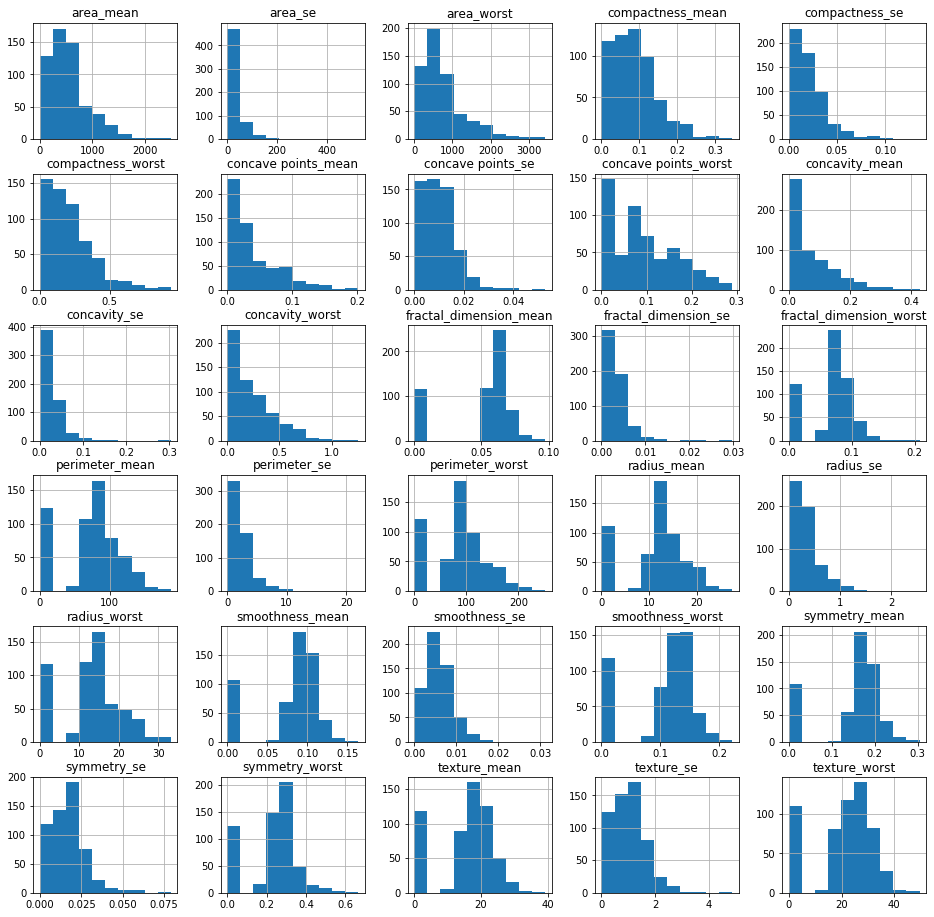

In [168]:
# Plot histograms for each variable
df.hist(figsize = (16, 16))
plt.show()

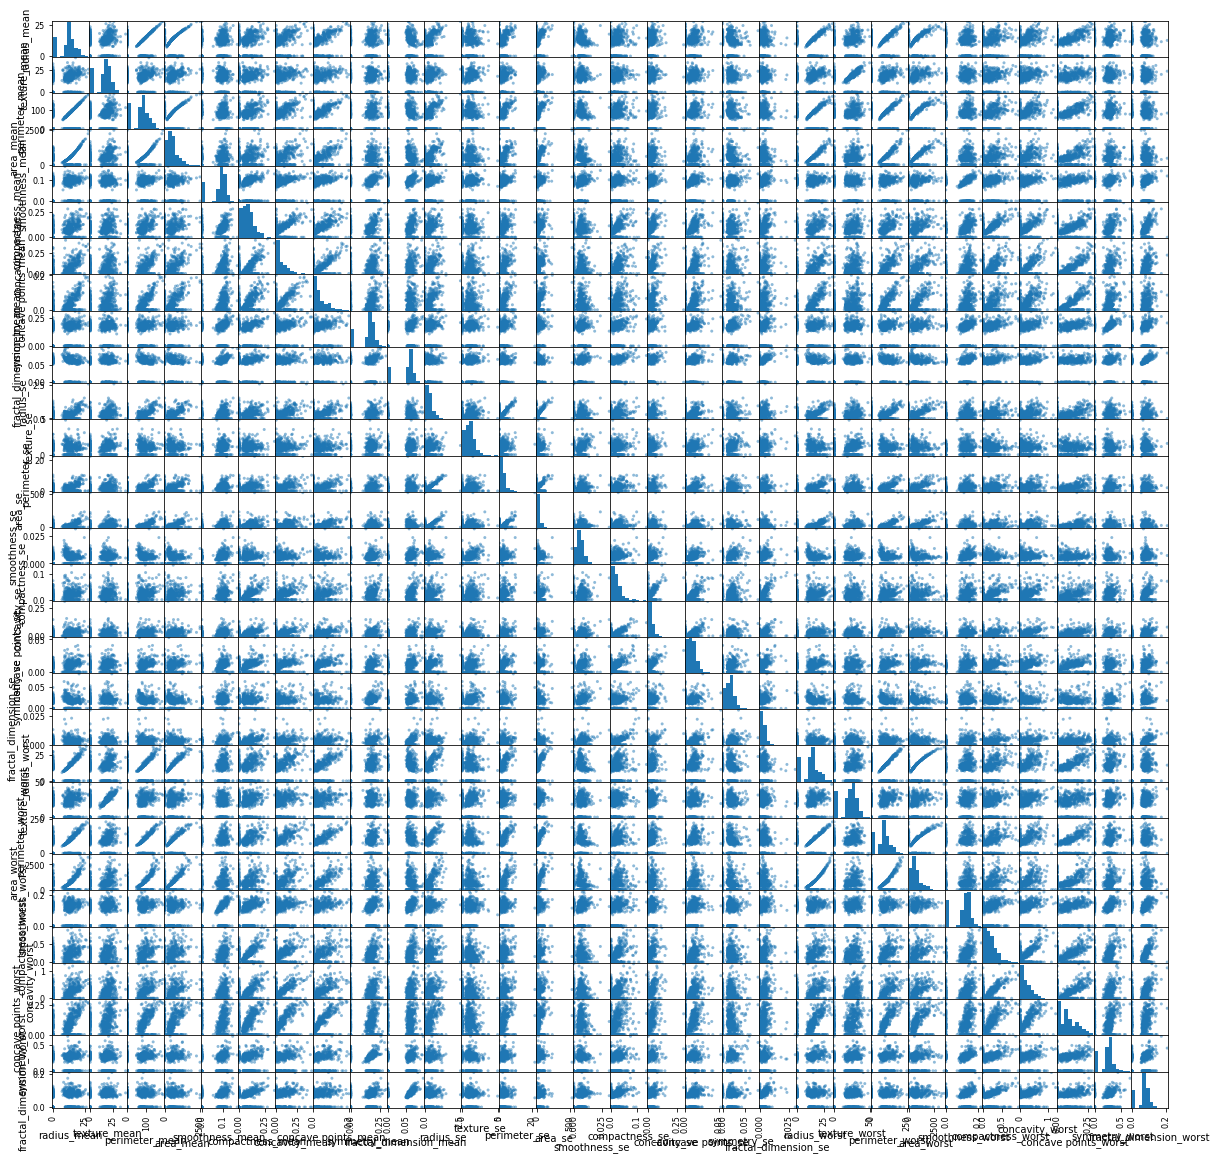

In [169]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (20,20))
plt.show()

In [65]:
# Create X and Y datasets for training
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm

THE SCORE IS: 0.7105263157894737
THE ACCURACY IS: 0.7105263157894737
THE SCORES ARE:- [0.6842105263157895, 0.6578947368421053, 0.7280701754385965, 0.7192982456140351, 0.7105263157894737, 0.6929824561403509, 0.7105263157894737, 0.6491228070175439, 0.6929824561403509, 0.6754385964912281, 0.6929824561403509, 0.6754385964912281, 0.6929824561403509, 0.6842105263157895, 0.6929824561403509, 0.6842105263157895, 0.6929824561403509, 0.6842105263157895, 0.6842105263157895, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6754385964912281, 0.6754385964912281, 0.6754385964912281]
The score of the classifer is:- 0.7868131868131868
The classes are:- [0 1]
CONFUSION MATRIX: [[27 28]
 [ 5 54]]
TN,FP,FN,TP:- 54 5 28 27


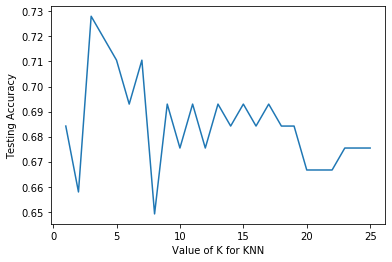

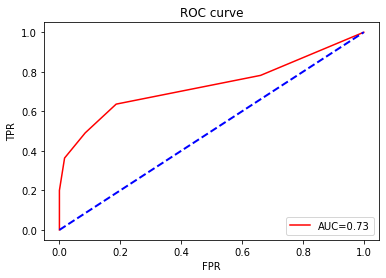

AUC:- 0.7295839753466871
SCORE OF AUC ROC: 0.7295839753466871


In [188]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#ACCURACY OF MODEL
print('THE SCORE IS:',classifier.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

accuracy=(cm[0,0]+cm[1,1])/y_test.size
print('THE ACCURACY IS:',accuracy)

from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print('THE SCORES ARE:-',scores)

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print('The score of the classifer is:-',classifier.score(X_train,y_train))

print('The classes are:-',classifier.classes_)


pred=classifier.predict(X_test)
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print('CONFUSION MATRIX:',con_mat)

#type-1=fp
#type2=fn
#73-11

tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

print('TN,FP,FN,TP:-',tn,fp,fn,tp)

accuracy=(con_mat[0,0]+con_mat[1,1]/y_test.size)

classifier.score(X_test,y_test)

##computing fpr and tpr
#we plot tpr vs fpr

preds=classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
#ADDING THE ROC
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
#RANDOM FPR AND TPR
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
#title and label
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('AUC:-',auc(fpr,tpr))

print('SCORE OF AUC ROC:',roc_auc_score(y_test,preds))

## Using Logistic Regression Algorithm to the Training Set

In [123]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_pred = classifier.predict(X_test)

In [125]:
classifier.score(X_train,y_train)

0.8175824175824176

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [127]:
accuracy=(cm[0,0]+cm[1,1])/y_test.size
accuracy

0.7456140350877193

In [128]:
est = lm.LogisticRegression()
est.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
est.score(X_train,y_train)

0.8175824175824176

THE SCORE IS:- 0.8175824175824176
classes:- [0 1]
coefficients:- [[ 0.03645908  0.08876878  0.08750901  0.36514883  0.05272355 -0.102339
   0.50925741  0.43860166  0.08756157 -0.00986023 -0.12541994  0.05703978
   0.36149054  0.33491759  0.01804519 -0.40644734  0.1808547  -0.03801282
  -0.03472128  0.04164806  0.11986085  0.0870402  -0.19659407  0.49829868
  -0.09109026  0.38932743  0.24857359  0.08177078  0.06563514  0.12593887]]
intercept:- [-0.15707422]
CONFUSION MATRIX:- [[34 21]
 [ 8 51]]
TN,FP,FN,TP: 51 8 21 34


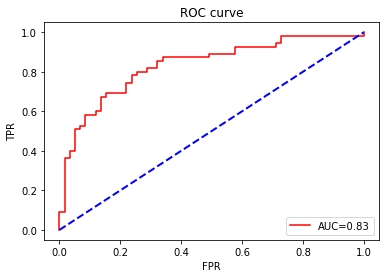

AUC: 0.8320493066255779
ROC AUC SCORE IS:- 0.8320493066255779


In [191]:
print('THE SCORE IS:-',est.score(X_train,y_train))

print('classes:-',est.classes_)
print('coefficients:-',est.coef_)
print('intercept:-',est.intercept_)

pred=est.predict(X_test)
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print('CONFUSION MATRIX:-',con_mat)

#type-1=fp
#type2=fn
#73-11

tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

print('TN,FP,FN,TP:',tn,fp,fn,tp)

accuracy=(con_mat[0,0]+con_mat[1,1]/y_test.size)
accuracy
est.score(X_test,y_test)

##computing fpr and tpr
#we plot tpr vs fpr

preds=est.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
#ADDING THE ROC
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
#RANDOM FPR AND TPR
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
#title and label
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('AUC:',auc(fpr,tpr))

print('ROC AUC SCORE IS:-',roc_auc_score(y_test,preds))

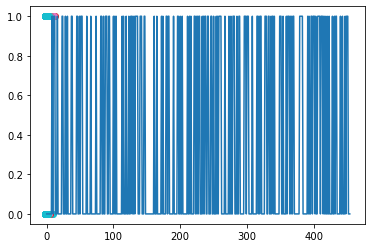

In [131]:
pred2 = est.predict(X_train)

plt.plot(X_train,y_train, linestyle="None", marker="o")
plt.plot(pred2)
plt.show()


## Using SVC method of svm class to use Kernel SVM Algorithm


In [193]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [194]:
y_pred = classifier.predict(X_test)

In [195]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [196]:
classifier.score(X_train,y_train)

0.8945054945054945

In [197]:
accuracy=(cm[0,0]+cm[1,1])/y_test.size
accuracy

0.7456140350877193

SCORE IS:- 0.8945054945054945
classes:- [0 1]
intercept:- [0.83582913]
CONFUSION MATRIX:- [[35 20]
 [ 9 50]]
TN,FP,FN,TP: 50 9 20 35


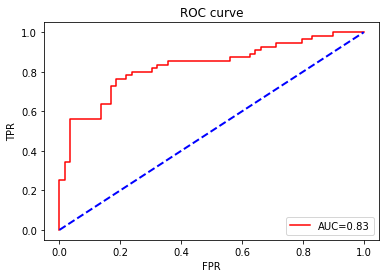

AUC: 0.8286594761171032
ROC AUC SCORE IS:- 0.8286594761171031


In [198]:
print('SCORE IS:-',classifier.score(X_train,y_train))

print('classes:-',classifier.classes_)
print('intercept:-',classifier.intercept_)

pred=classifier.predict(X_test)
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print('CONFUSION MATRIX:-',con_mat)

#type-1=fp
#type2=fn
#73-11

tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

print('TN,FP,FN,TP:',tn,fp,fn,tp)

accuracy=(con_mat[0,0]+con_mat[1,1]/y_test.size)
accuracy
classifier.score(X_test,y_test)

##computing fpr and tpr
#we plot tpr vs fpr

preds=classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
#ADDING THE ROC
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
#RANDOM FPR AND TPR
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
#title and label
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('AUC:',auc(fpr,tpr))

print('ROC AUC SCORE IS:-',roc_auc_score(y_test,preds))

## Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

In [199]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [200]:
y_pred = classifier.predict(X_test)

In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [202]:
accuracy=(cm[0,0]+cm[1,1])/y_test.size
accuracy

0.7017543859649122

THE SCORE IS:- 1.0
classes:- [0 1]
CONFUSION MATRIX: [[37 18]
 [16 43]]
TN,FP,FN,TP: 43 16 18 37


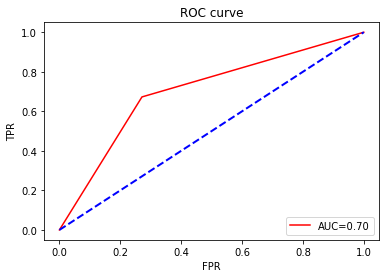

AUC: 0.7007704160246534
SCORE OF ROC AUC : 0.7007704160246534


In [203]:
print('THE SCORE IS:-',classifier.score(X_train,y_train))

print('classes:-',classifier.classes_)


pred=classifier.predict(X_test)
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print('CONFUSION MATRIX:',con_mat)

#type-1=fp
#type2=fn
#73-11

tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

print('TN,FP,FN,TP:',tn,fp,fn,tp)

accuracy=(con_mat[0,0]+con_mat[1,1]/y_test.size)
accuracy
classifier.score(X_test,y_test)

##computing fpr and tpr
#we plot tpr vs fpr

preds=classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
#ADDING THE ROC
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
#RANDOM FPR AND TPR
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
#title and label
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('AUC:',auc(fpr,tpr))

print('SCORE OF ROC AUC :',roc_auc_score(y_test,preds))

## #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

In [204]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [205]:
y_pred = classifier.predict(X_test)

In [206]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [207]:
accuracy=(cm[0,0]+cm[1,1])/y_test.size
accuracy

0.8157894736842105

THE SCORE IS: 0.9868131868131869
classes:- [0 1]
CONFUSION MATRIX:- [[43 12]
 [ 9 50]]
TN,FP,FN,TP: 50 9 12 43


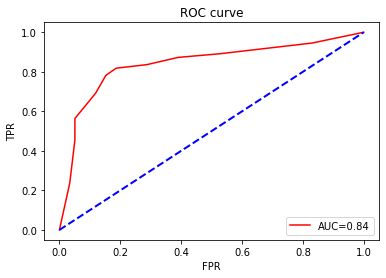

AUC:- 0.8400616332819723
ROC AUC SCORE IS:- 0.8400616332819723


In [208]:
print('THE SCORE IS:',classifier.score(X_train,y_train))

print('classes:-',classifier.classes_)


pred=classifier.predict(X_test)
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print('CONFUSION MATRIX:-',con_mat)

#type-1=fp
#type2=fn
#73-11

tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

print('TN,FP,FN,TP:',tn,fp,fn,tp)

accuracy=(con_mat[0,0]+con_mat[1,1]/y_test.size)
accuracy
classifier.score(X_test,y_test)

##computing fpr and tpr
#we plot tpr vs fpr

preds=classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
#ADDING THE ROC
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
#RANDOM FPR AND TPR
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
#title and label
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('AUC:-',auc(fpr,tpr))

print('ROC AUC SCORE IS:-',roc_auc_score(y_test,preds))